# 1 

A partir del fichero "US_Crime_Rates_1960_2014", se pide:

1. Tratar el dataset como una serie temporal a partir de la columna Year. Siempre el eje X será el nuevo índice Year.
2. Dibujar todas las columnas numéricas.
3. Como se puede ver en el punto 2, la columna "Population" tiene una magnitud diferente a la de las demás columnas: Dibuja la misma gráfica que antes pero con dos resoluciones diferentes para que se puedan observar con mejor detalle todas las columnas. 
4. A partir de ahora y para el resto del ejercicio, borra las columnas "Population" y "Total" ¿Qué columnas tienen mejor correlación? 
5. A partir de las cinco columnas que tengan mejor correlación con la columna "Murder", entrena un modelo de regresión no lineal a partir de polinomio de grado 6. Este modelo ha de entrenarse siguiendo el esquema recomendado de validación cruzada y almacenando los errores de entrenamiento y validación en cada iteración del entrenamiento.
6. Representa la evolución de los errores de validación y entrenamiento en una gráfica. ¿Ha habido sobreaprendizaje?. Utiliza n_iteraciones=23 y n_repeats=7.

<AxesSubplot:xlabel='Year'>

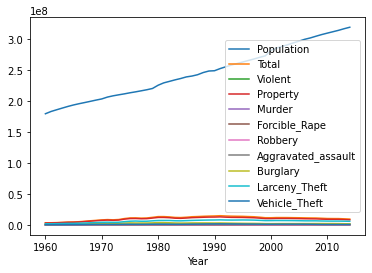

In [20]:
import pandas as pd
df = pd.read_csv("../data/US_Crime_Rates_1960_2014.csv")

df.set_index("Year", inplace=True)
df.plot()

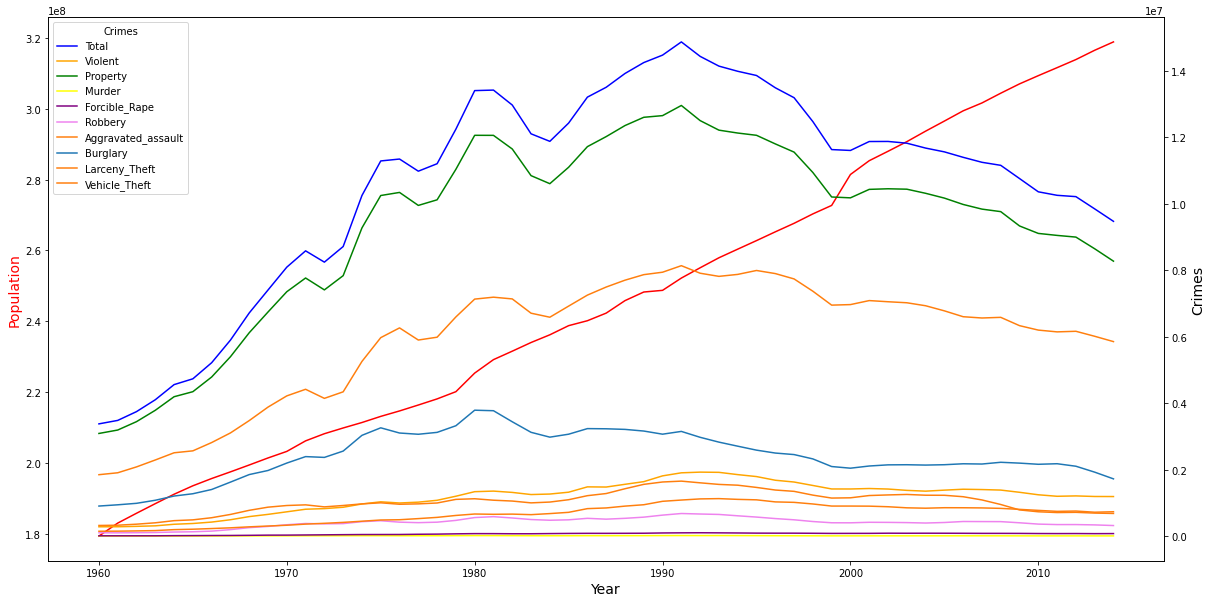

In [47]:
import matplotlib.pyplot as plt 


df['Year'] = df.index

# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(20, 10))

# se crea el plot de referencia con Population
ax.plot(df.Year, df.Population, color="red")
ax.set_xlabel("Year",fontsize=14)
ax.set_ylabel("Population",color="red",fontsize=14)

# se crea el segundo eje-Y y se dibuja la descripción del eje
ax2=ax.twinx()
ax2.set_ylabel("Crimes",color="black",fontsize=14)

# se añaden los valores a la gráfica
ax2.plot(df.Year, df["Total"],color="blue", label='Total')
ax2.plot(df.Year, df["Violent"],color="orange", label='Violent')
ax2.plot(df.Year, df["Property"],color="green", label='Property')
ax2.plot(df.Year, df["Murder"],color="yellow", label='Murder')
ax2.plot(df.Year, df["Forcible_Rape"],color="purple", label='Forcible_Rape')
ax2.plot(df.Year, df["Robbery"],color="violet", label='Robbery')
ax2.plot(df.Year, df["Aggravated_assault"],color="C1", label='Aggravated_assault')
ax2.plot(df.Year, df["Burglary"],color="C10", label='Burglary')
ax2.plot(df.Year, df["Larceny_Theft"],color="C2", label='Larceny_Theft')
ax2.plot(df.Year, df["Vehicle_Theft"],color="C22", label='Vehicle_Theft')
					

plt.legend(loc='upper left', title='Crimes')
plt.show()
# save the plot as a file
# fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg', format='jpeg', dpi=100, bbox_inches='tight')

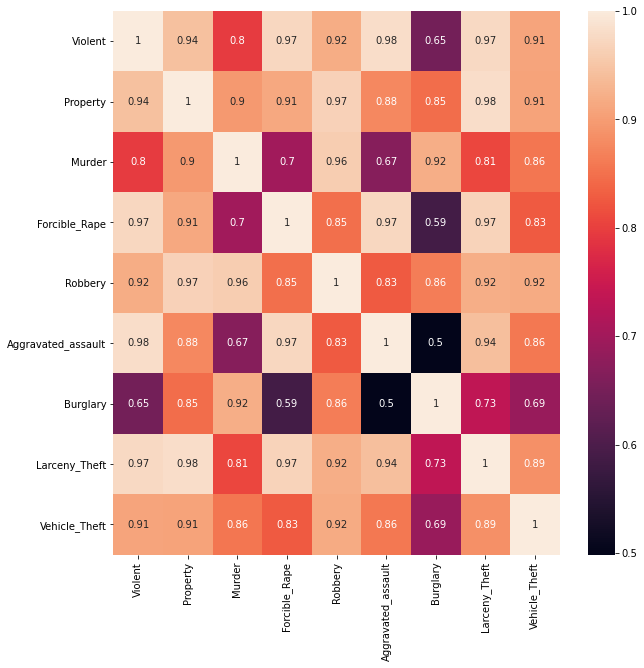

In [54]:
import numpy as np 
import seaborn as sn
df2 = df.drop(columns=["Population","Total","Year"])
corrMatrix = df2.corr()
plt.figure(figsize=(10,10))
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [56]:
np.min(corrMatrix)

Violent               0.646607
Property              0.847149
Murder                0.668511
Forcible_Rape         0.588529
Robbery               0.826500
Aggravated_assault    0.498449
Burglary              0.498449
Larceny_Theft         0.734091
Vehicle_Theft         0.690423
dtype: float64

In [74]:
ex = np.diag(np.array(corrMatrix).diagonal())
corrMatrixClean = corrMatrix - ex
np.max(corrMatrixClean)

Violent               0.981071
Property              0.980528
Murder                0.960156
Forcible_Rape         0.974379
Robbery               0.965363
Aggravated_assault    0.981071
Burglary              0.920207
Larceny_Theft         0.980528
Vehicle_Theft         0.916280
dtype: float64

Las columnas con mayor correlación son Violent y Aggravated_Assault (0'981071)

5. A partir de las cinco columnas que tengan mejor correlación con la columna "Murder", entrena un modelo de regresión no lineal a partir de polinomio de grado 6. 

Este modelo ha de entrenarse siguiendo el esquema recomendado de validación cruzada y almacenando los errores de entrenamiento y validación en cada iteración del entrenamiento.


6. Representa la evolución de los errores de validación y entrenamiento en una gráfica. 

¿Ha habido sobreaprendizaje?. Utiliza n_iteraciones=23 y n_repeats=7.

In [86]:
for elem in corrMatrixClean.iterrows():
    if elem[0] == 'Murder':
        print(elem[1].sort_values(ascending=False).head(5))

Robbery          0.960156
Burglary         0.920207
Property         0.895641
Vehicle_Theft    0.856600
Larceny_Theft    0.806279
Name: Murder, dtype: float64


C:\Users\barke\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\barke\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


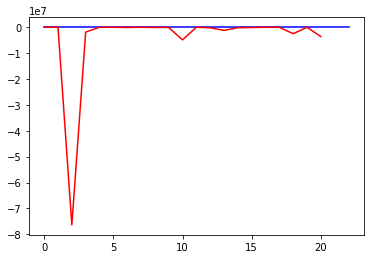

C:\Users\barke\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\barke\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


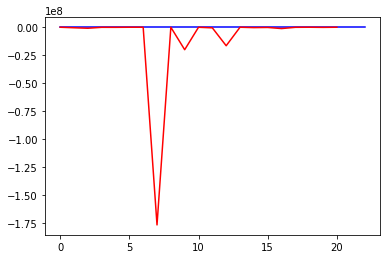

C:\Users\barke\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\barke\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


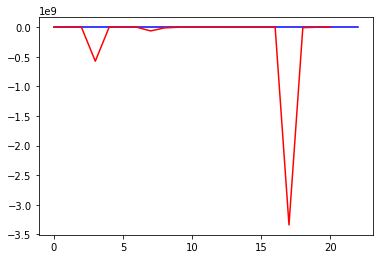

C:\Users\barke\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\barke\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


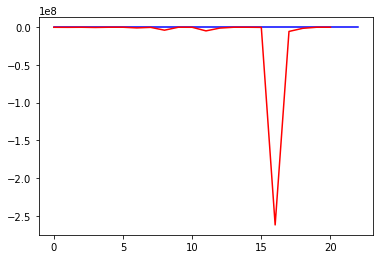

C:\Users\barke\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\barke\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


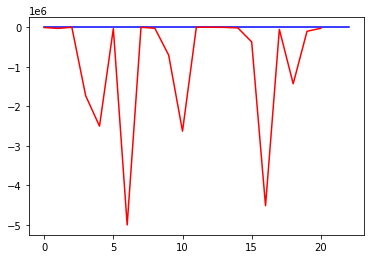

C:\Users\barke\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\barke\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


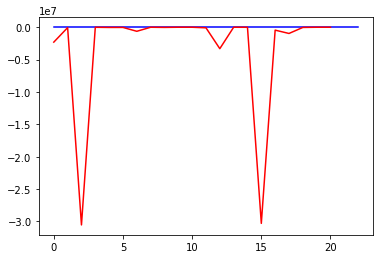

C:\Users\barke\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\barke\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


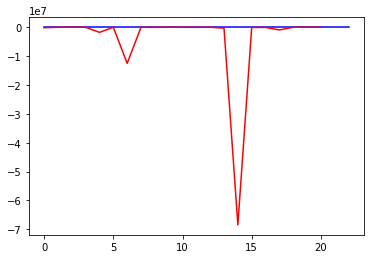

In [120]:
# entrenamiento del modelo 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import RepeatedKFold 

# variables de control
rd_st = 42 #random_state = 42
dg = 6 # degree es igual a 6
nsp = 23 # n_splits = 23
nrp = 7 # n_repeats = 7

df3 = df[['Robbery','Burglary','Property','Vehicle_Theft','Larceny_Theft','Murder']]
X = np.array(df3[['Robbery','Burglary','Property','Vehicle_Theft','Larceny_Theft']])
y = np.array(df3['Murder'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rd_st)

rkf = RepeatedKFold(n_splits=nsp, n_repeats=nrp, random_state=rd_st) # n_repeats es el número de épocas
val_score = []
train_score = []
dict_result = {}
epoc= 0

polinominal_model = PolynomialFeatures(dg) 
X_train = polinominal_model.fit_transform(X_train,y_train)
model = LinearRegression()

for i, (train, val) in enumerate(rkf.split(X_train)):
    # se entrena el modelo para este tandem de train/validation
    model.fit(X_train[train], y_train[train]) # se cogen los índices que se generan en kfold_split del for

    score_val = model.score(X_train[val], y_train[val])
    val_score.append(score_val)
    score_train = model.score(X_train[train], y_train[train])
    train_score.append(score_train)

    if i%nsp == nsp -1:
        epoc += 1
        dict_result[epoc] = [train_score, val_score]
        plt.plot(train_score, color="b")
        plt.plot(val_score, color="r")
        plt.show()
        val_score = []
        train_score = []

según las gráficas se puede observar que hay overfitting en cada una de las épocas, ya que en todas ellas hay un pico descendiente que revela un caso donde el modelo no ha sido capaz de predecir los datos de validación.